In [74]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [75]:
pwd

'C:\\Users\\Kuber Kumar\\Desktop\\Deep Learning End to End Project\\spam detection'

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
df = pd.read_csv("smsspamcollection_data/spamham.csv",names=["class", "message"],encoding='latin1')

In [78]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

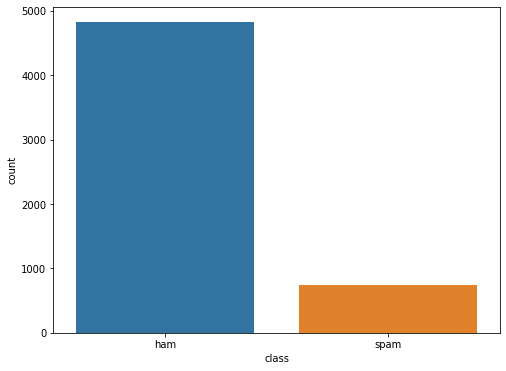

In [80]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['class'])

In [81]:
df.describe()

,class,message
count,5572,5572
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4825,30


In [113]:
df.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    652  Please call our customer service representativ...    4

In [82]:
df[df.duplicated()].value_counts()


class  message                                                                                                                                                       
ham    Sorry, I'll call later                                                                                                                                            29
       I cant pick the phone right now. Pls send a message                                                                                                               11
       Ok...                                                                                                                                                              9
       Ok                                                                                                                                                                 3
       Okie                                                                                                                                       

In [102]:
df[df.duplicated()]

103     As per your request 'Melle Melle (Oru Minnamin...
154     As per your request 'Melle Melle (Oru Minnamin...
207     As I entered my cabin my PA said, '' Happy B'd...
223                                Sorry, I'll call later
326                      No calls..messages..missed calls
                              ...                        
5524    You are awarded a SiPix Digital Camera! call 0...
5535    I know you are thinkin malaria. But relax, chi...
5539                           Just sleeping..and surfing
5553                          Hahaha..use your brain dear
5558                               Sorry, I'll call later
Name: message, Length: 404, dtype: object

In [104]:
#df['message'].str.contains("sorry", case=False)
df[df.duplicated()]['message'].str.contains("Sorry, I'll call later", case=False)

103     False
154     False
207     False
223      True
326     False
        ...  
5524    False
5535    False
5539    False
5553    False
5558     True
Name: message, Length: 404, dtype: bool

In [138]:
df_new =df.drop_duplicates()

In [139]:
df_new

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [140]:
df_new['class'].value_counts()

ham     4516
spam     652
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

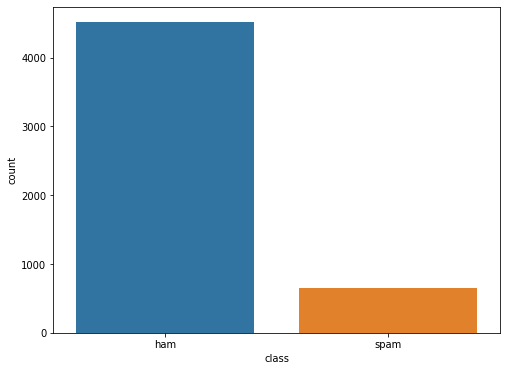

In [141]:
plt.figure(figsize=(8,6))
sns.countplot(x=df_new['class'])

In [142]:
df_new.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4516   4516  Go until jurong point, crazy.. Available only ...    1
spam      652    652  Free entry in 2 a wkly comp to win FA Cup fina...    1

# Inbalanced dataset , so we do sampling

In [143]:
df_new_spam = df_new[df_new['class'] == 'spam']
df_new_spam.shape

(652, 2)

In [144]:
df_new_ham = df_new[df_new['class'] == 'ham']
df_new_ham.shape

(4516, 2)

In [145]:
df_new_ham_downsampled = df_new_ham.sample(df_new_spam.shape[0]) 
df_new_ham_downsampled.shape

(652, 2)

In [146]:
dff = pd.concat([df_new_ham_downsampled,df_new_spam])
dff.shape

(1304, 2)

In [147]:
dff.head()

,class,message
3736,ham,"Its £6 to get in, is that ok?"
5363,ham,"I think your mentor is , but not 100 percent s..."
886,ham,Gibbs unsold.mike hussey
343,ham,Where u been hiding stranger?
2233,ham,Nothing just getting msgs by dis name wit diff...


In [148]:
dff = dff.sample(frac=1).reset_index(drop=True)
dff.head()

,class,message
0,ham,Ill call you evening ill some ideas.
1,ham,Can you call me plz. Your number shows out of ...
2,spam,Ringtone Club: Gr8 new polys direct to your mo...
3,ham,Yes:)here tv is always available in work place..
4,spam,Do you want a New Nokia 3510i colour phone Del...


# Converting the class to numerical values 

In [149]:
dff['spam'] = dff['class'].apply(lambda x : 1 if x=='spam' else 0)
dff.head

<bound method NDFrame.head of      class                                            message  spam
0      ham               Ill call you evening ill some ideas.     0
1      ham  Can you call me plz. Your number shows out of ...     0
2     spam  Ringtone Club: Gr8 new polys direct to your mo...     1
3      ham   Yes:)here tv is always available in work place..     0
4     spam  Do you want a New Nokia 3510i colour phone Del...     1
...    ...                                                ...   ...
1299  spam  8007 25p 4 Alfie Moon's Children in Need song ...     1
1300  spam  New TEXTBUDDY Chat 2 horny guys in ur area 4 j...     1
1301   ham                        K, can that happen tonight?     0
1302   ham  Dear,regret i cudnt pick call.drove down frm c...     0
1303   ham  I thk 50 shd be ok he said plus minus 10.. Did...     0

[1304 rows x 3 columns]>

In [151]:
 dff.sample(15)

,class,message,spam
968,spam,"URGENT! Your Mobile No was awarded a £2,000 Bo...",1
175,spam,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...,1
320,spam,URGENT! Your Mobile number has been awarded wi...,1
867,spam,URGENT! Your Mobile number has been awarded a ...,1
1024,spam,You are a winner U have been specially selecte...,1
187,ham,Those ducking chinchillas,0
149,ham,Just sing HU. I think its also important to fi...,0
322,ham,I emailed yifeng my part oredi.. Can ü get it ...,0
428,spam,Double your mins & txts on Orange or 1/2 price...,1
185,ham,Ok i also wan 2 watch e 9 pm show...,0


# MODEL trian test split

In [152]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dff['message'],dff['spam'],stratify=dff['spam'])


In [153]:
x_train.head()

594               U come n search tat vid..not finishd..
853    Dear U've been invited to XCHAT. This is our f...
599    You are guaranteed the latest Nokia Phone, a 4...
932    She.s find. I sent you an offline message to k...
522          Didn't try, g and I decided not to head out
Name: message, dtype: object

In [154]:
y_train.head()

594    0
853    1
599    1
932    0
522    0
Name: spam, dtype: int64

# BERT model loading 

In [160]:
#BERT base model

preprocessed_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
bert_preprocess = hub.KerasLayer(preprocessed_url)
bert_encoder = hub.KerasLayer(encoder_url)

In [161]:
def get_sentence_embeddng(sent):
    processed_text = bert_preprocess(sent)
    return bert_encoder(processed_text)['pooled_output']

In [173]:
# sent=['URGENT! Your Mobile No was awarded a £2,000 Bo','helloe vinod ']
# get_sentence_embeddng(sent)
# e = get_sentence_embeddng(
# ["banana", "apple","mango", "Bill Gates", "Sathya Nadalla"])
# from sklearn.metrics.pairwise import cosine_similarity

# cosine_similarity([e[0]],[e[4]])

# model training using functional model

In [189]:
text_input = tf.keras.layers.Input(shape=(), dtype = tf.string, name='text')
out = get_sentence_embeddng(text_input)

inp = tf.keras.layers.Dropout(0.1, name='Dropout1')(out)
#hid1 = tf.keras.layers.Dense(500, activation='relu')(inp)
#inp = tf.keras.layers.Dropout(0.1, name='Dropout2')(hid1)
inp = tf.keras.layers.Dense(1, activation='sigmoid', name='outputlayer')(inp)

model = tf.keras.Model(inputs=[text_input], outputs=[inp])

In [190]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer_2 (KerasLayer)      {'input_word_ids': ( 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_3 (KerasLayer)      {'pooled_output': (N 109482241   keras_layer_2[6][0]              
                                                                 keras_layer_2[6][1]              
                                                                 keras_layer_2[6][2]              
____________________________________________________________________________________________

In [192]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precison"),
    tf.keras.metrics.Recall(name="recall")
]
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS
)

In [195]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
31/31 [==============================] - 217s 7s/step - loss: 0.6334 - accuracy: 0.6370 - precison: 0.6373 - recall: 0.6360
Epoch 2/10
31/31 [==============================] - 195s 6s/step - loss: 0.5200 - accuracy: 0.7996 - precison: 0.8021 - recall: 0.7955
Epoch 3/10
31/31 [==============================] - 192s 6s/step - loss: 0.4444 - accuracy: 0.8599 - precison: 0.8506 - recall: 0.8732
Epoch 4/10
31/31 [==============================] - 204s 7s/step - loss: 0.4059 - accuracy: 0.8630 - precison: 0.8460 - recall: 0.8875
Epoch 5/10
31/31 [==============================] - 219s 7s/step - loss: 0.3768 - accuracy: 0.8763 - precison: 0.8695 - recall: 0.8855
Epoch 6/10
31/31 [==============================] - 214s 7s/step - loss: 0.3480 - accuracy: 0.8885 - precison: 0.8711 - recall: 0.9121
Epoch 7/10
31/31 [==============================] - 218s 7s/step - loss: 0.3301 - accuracy: 0.8957 - precison: 0.8909 - recall: 0.9018
Epoch 8/10
31/31 [==============================] - 215

In [196]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 70s 6s/step - loss: 0.2995 - accuracy: 0.8804 - precison: 0.8875 - recall: 0.8712


[0.2995088994503021, 0.8803681135177612, 0.887499988079071, 0.8711656332015991]

In [197]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()

In [229]:
import numpy as np

y_predicted = np.where(y_pred >0.5 ,1,0)
y_predicted

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [230]:
from sklearn.metrics import confusion_matrix, classification_report

cmm = confusion_matrix(y_test, y_predicted)
cmm

array([[145,  18],
       [ 21, 142]], dtype=int64)

Text(33.0, 0.5, 'True values')

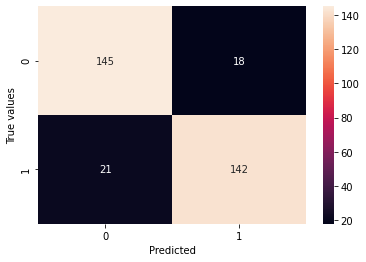

In [231]:
sns.heatmap(cmm, annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True values")

In [232]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       163
           1       0.89      0.87      0.88       163

    accuracy                           0.88       326
   macro avg       0.88      0.88      0.88       326
weighted avg       0.88      0.88      0.88       326



# inference 

In [249]:
review =[
    "you won a BIG Lottery of 500 Million  DOLLARS, so that PLEASE call me, ITs very URGENT ",
    "I am very sorry for your loss",
    "THIs Lottery is WORTH 100 DOLLARS,PLease colelct"
]

a= model.predict(review).flatten() 

In [250]:
a

array([0.24737069, 0.05495796, 0.42315823], dtype=float32)

In [252]:
if a> 0.3:
    print("It's a spam mail")
else:
    print("ITs a HAM")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [253]:
pwd

'C:\\Users\\Kuber Kumar\\Desktop\\Deep Learning End to End Project\\spam detection'

In [254]:
model.save("./saved_models/beta")

INFO:tensorflow:Assets written to: ./saved_models/beta\assets


INFO:tensorflow:Assets written to: ./saved_models/beta\assets
